<a href="https://colab.research.google.com/github/fmezacr/machinelearning/blob/main/Algoritmos_NO_SUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---


# **Comparación de Algoritmos de Clustering: K-means, Aglomeración y DBSCAN**
### **Autor: Felipe Meza-Obando**

### **Introducción**

En esta notebook, se exploran tres de los algoritmos de clustering más utilizados en el análisis de datos no supervisados: **K-means**, **Aglomeración Jerárquica** y **DBSCAN**. Estos algoritmos nos permiten descubrir patrones y estructuras ocultas en los datos al agrupar muestras según su similitud, aunque utilizan enfoques y suposiciones diferentes para formar los clústeres.



### **Objetivo**

Esta notebook tiene como objetivo explorar los resultados de los tres algoritmos de clustering en diferentes configuraciones de datos, visualizando tanto los clústeres generados como los parámetros que los afectan. Se examinan los clústeres generados por cada algoritmo y las variaciones en los parámetros clave, como el número de clústeres en **K-means**, los criterios de enlace en **Aglomeración Jerárquica**, y los valores de `eps` y `min_samples` en **DBSCAN**.

1. **K-means**:
   - Este algoritmo particiona el espacio de datos en **K clústeres** basándose en la distancia a los **centroides**, que son recalculados iterativamente para minimizar la variación dentro de los clústeres. Es eficiente y adecuado para datos que tienen clústeres bien definidos y esféricos, pero requiere que el número de clústeres **K** se especifique de antemano.


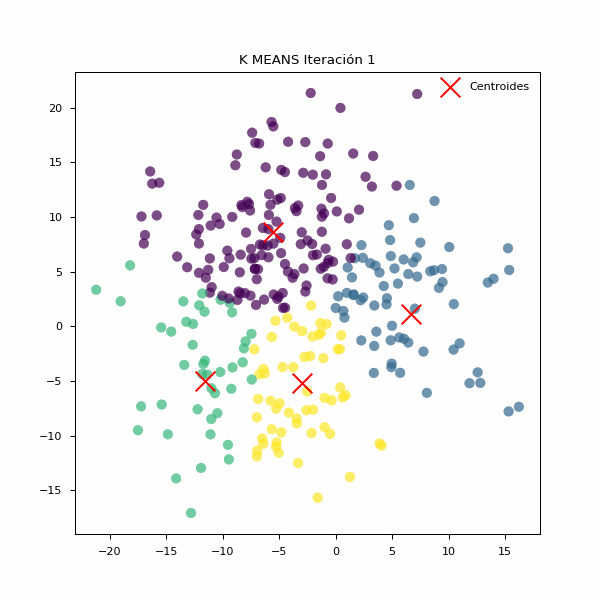

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
from IPython.display import Image
import imageio.v2 as imageio  # Importar la versión correcta

plt.style.use("seaborn-v0_8-paper")

# Crear un directorio para guardar las imágenes
if not os.path.exists('kmeans_images'):
    os.makedirs('kmeans_images')

# Generar datos simulados
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=5.0)

# Inicializar KMeans con 4 clústeres y guardar la historia de los centroides
kmeans = KMeans(n_clusters=4, init='random', n_init=1, max_iter=1, random_state=42)
centroid_history = []

# Función para guardar imágenes en cada iteración de K-means
def save_kmeans_images(iteration, centroids, clusters):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides')
    plt.title(f'K MEANS Iteración {iteration}')
    plt.legend()
    plt.savefig(f'kmeans_images/iter_{iteration}.png')
    plt.close()

# Ejecutar K-means iterativamente y capturar imágenes
max_iterations = 30
for i in range(max_iterations):
    kmeans.max_iter = i + 1  # Incrementar las iteraciones
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    clusters = kmeans.predict(X)

    # Guardar la historia de los centroides
    centroid_history.append(np.copy(centroids))

    # Guardar la imagen en cada iteración
    save_kmeans_images(i + 1, centroids, clusters)

# Crear una animación GIF a partir de las imágenes generadas
import imageio
images = []
for i in range(1, max_iterations + 1):
    filename = f'kmeans_images/iter_{i}.png'
    images.append(imageio.v2.imread(filename))


# Guardar como un archivo gif
imageio.mimsave('kmeans_evolution.gif', images, fps=1)

# Mostrar el gif en Google Colab
Image(filename='kmeans_evolution.gif')


2. **Aglomeración Jerárquica**:
   - El clustering aglomerativo es un método jerárquico que forma una **estructura de árbol** (dendrograma) fusionando los clústeres más cercanos de manera recursiva hasta que todos los puntos estén en un solo clúster. Este enfoque permite observar cómo varían los clústeres a diferentes niveles de granularidad, proporcionando una visión más completa de las relaciones entre los datos.



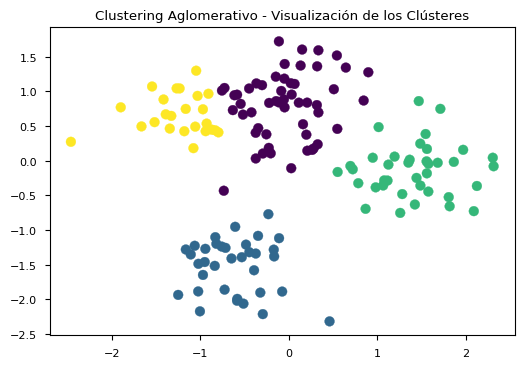

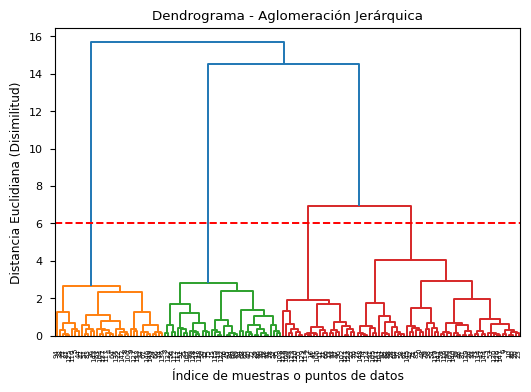

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Generar datos simulados
X, y = make_blobs(n_samples=150, centers=4, cluster_std=2.60, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar clustering aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_pred = agg_clustering.fit_predict(X_scaled)

# Visualizar los clústeres
plt.figure(figsize=(6, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title("Clustering Aglomerativo - Visualización de los Clústeres")
plt.show()

# Generar el dendrograma
Z = linkage(X_scaled, method='ward')

# Visualizar el dendrograma con una línea punteada fija
plt.figure(figsize=(6, 4))
plt.title("Dendrograma - Aglomeración Jerárquica")
dendrogram(Z)
plt.axhline(y=6, color='r', linestyle='--')  # Línea punteada en el corte con valor fijo
plt.xlabel("Índice de muestras o puntos de datos")
plt.ylabel("Distancia Euclidiana (Disimilitud)")
plt.show()




3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
   - A diferencia de K-means y la aglomeración jerárquica, **DBSCAN** es un algoritmo basado en densidad que identifica clústeres como regiones densas separadas por áreas de menor densidad. Esto le permite detectar **clústeres de formas arbitrarias** y manejar mejor los **outliers** (puntos de ruido) sin necesidad de especificar el número de clústeres de antemano.

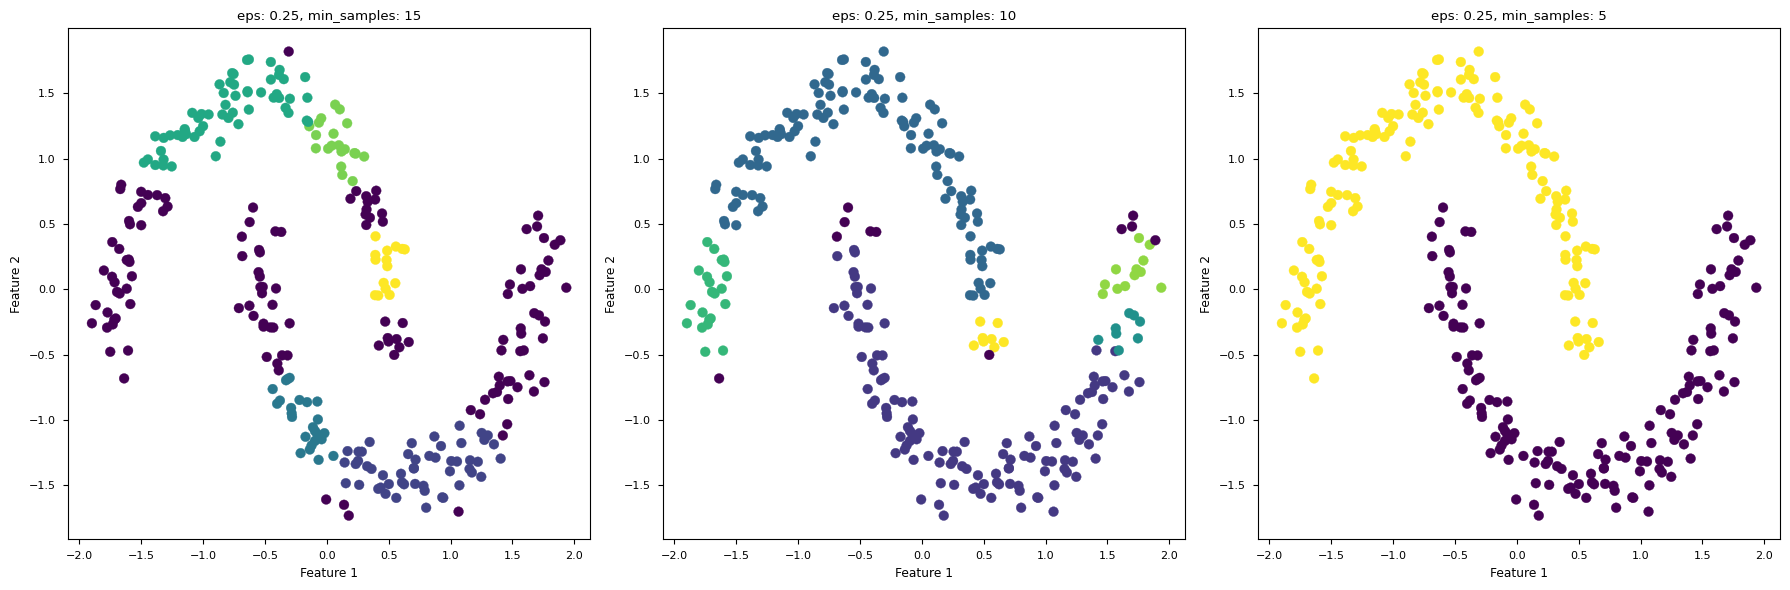

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Generar datos en forma de lunas (moons)
X, y = make_moons(n_samples=300, noise=0.07, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Función para aplicar DBSCAN y retornar los resultados
def apply_dbscan(eps, min_samples):
    # Ajustar el modelo DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_dbscan = dbscan.fit_predict(X_scaled)
    return y_dbscan

# Parámetros a probar
params = [
    {"eps": 0.25, "min_samples": 15},
    {"eps": 0.25, "min_samples": 10},
    {"eps": 0.25, "min_samples": 5}
]

# Crear una figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Aplicar DBSCAN y graficar los resultados en una fila
for i, param in enumerate(params):
    y_dbscan = apply_dbscan(eps=param["eps"], min_samples=param["min_samples"])
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan, cmap='viridis', s=50)
    axes[i].set_title(f"eps: {param['eps']}, min_samples: {param['min_samples']}")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")

# Mostrar los gráficos
plt.tight_layout()
plt.show()
